### Тема: Проверка статистических гипотез по данным котировок за полгода.

In [141]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from math import sqrt

In [50]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        pass
        
    def fit(self, df):
        """Сохранение статистик"""
        pass
        
    def transform(self, df):
        """Трансформация данных"""
        
        # Преобразование даты
        df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')

        # Исключение неиспользуемых фич
        df.drop(columns=['<TICKER>', '<PER>', '<TIME>'], inplace=True)
        
        return df
    

def fit_trasform(df):
    pipe = DataPipeline()
    pipe.fit(df)
    return pipe.transform(df)

def read_csv(path):
    return fit_trasform(pd.read_csv(path))

In [80]:
# Константы
paths = ['csv/SIBN_210101_210601.csv',
        'csv/ROSN_210101_210601.csv',
        'csv/SBER_210101_210601.csv',
        'csv/VTBR_210101_210601.csv',
        'csv/YNDX_210101_210601.csv']
titles = ['ГПН',
         'Роснефть',
         'Сбер',
         'ВТБ',
         'Yandex']

In [60]:
# Датасеты
df_gpn, df_rosn, df_sber, df_vtb, df_yndx = dfs = [read_csv(path) for path in paths]

In [53]:
df_gpn.head()

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,322.75,1336920
1,2021-01-05,323.90,871870
2,2021-01-06,326.70,2252750
3,2021-01-08,337.00,3120920
4,2021-01-11,334.30,2440180


In [54]:
df_rosn.head()

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,436.00,6387860
1,2021-01-05,449.35,6724540
2,2021-01-06,453.70,8220600
3,2021-01-08,478.20,12695070
4,2021-01-11,473.25,8789190


In [55]:
df_sber.head()

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,272.00,48799460
1,2021-01-05,275.20,45554100
2,2021-01-06,272.93,40905340
3,2021-01-08,283.64,88672940
4,2021-01-11,289.49,112210400


In [56]:
df_vtb.head()

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,0.037925,23826040000
1,2021-01-05,0.038445,28782590000
2,2021-01-06,0.038235,25428390000
3,2021-01-08,0.038940,39504750000
4,2021-01-11,0.039890,60293350000


In [57]:
df_yndx.head()

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,5185.2,574279
1,2021-01-05,5340.4,688355
2,2021-01-06,5188.8,806459
3,2021-01-08,5254.2,892172
4,2021-01-11,5214.2,797440


In [59]:
# Проверка на null
df_gpn.isnull().sum() + df_rosn.isnull().sum() + df_sber.isnull().sum() + df_vtb.isnull().sum() + df_yndx.isnull().sum()

<DATE>     0
<CLOSE>    0
<VOL>      0
dtype: int64

### Гипотеза 1: В смежных областях цены на акции имеют обратную связь

- H0 - при падении цен акций ГПН, цены акций Роснефть - растут.
- H1 - при падении цен акций ГПН, цены акций Роснефть - не растут.

Аналогично для ВТБ и Сбер.

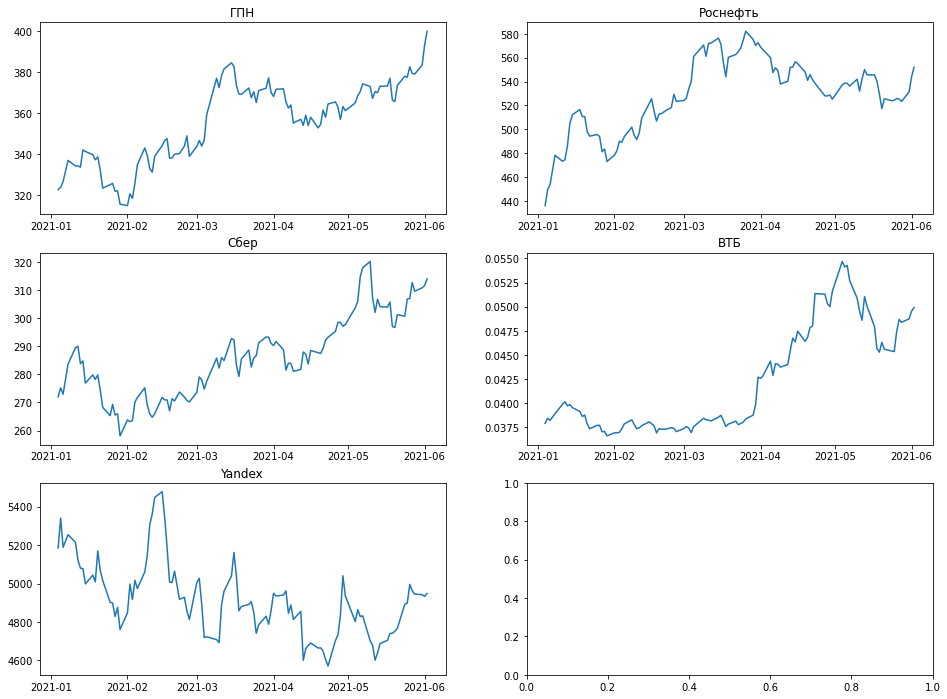

In [81]:
# Визуализация
# Распределение цен

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(16, 12)

for i, df in enumerate(dfs):
    ax[int(i/2)][int(i%2)].plot(df['<DATE>'], df['<CLOSE>'])
    ax[int(i/2)][int(i%2)].set_title(titles[i])

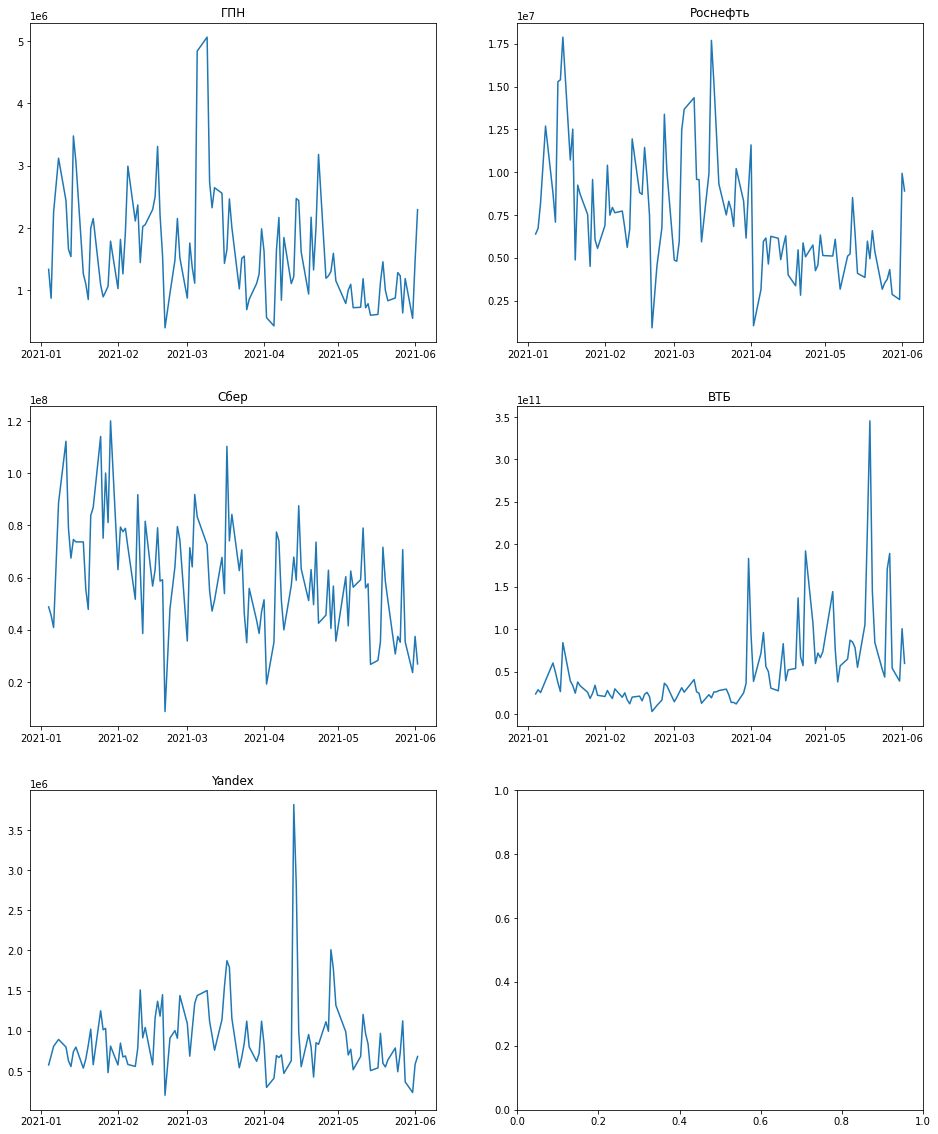

In [91]:
# Визуализация
# Объем

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(16, 20)

for i, df in enumerate(dfs):
    ax[int(i/2)][int(i%2)].plot(df['<DATE>'], df['<VOL>'])
    ax[int(i/2)][int(i%2)].set_title(titles[i])

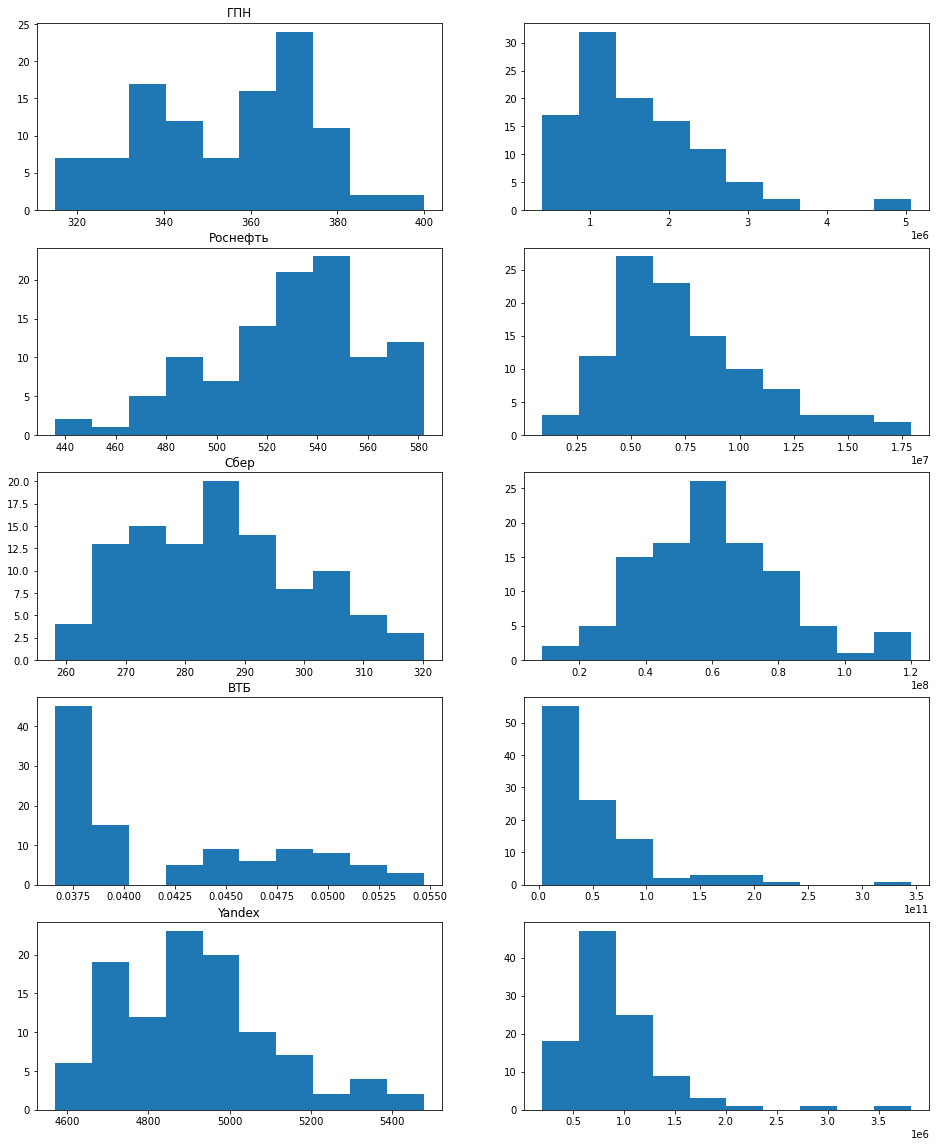

In [92]:
# Визуализация
# Распределение цен и объема

fig, ax = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(16, 20)

for i, df in enumerate(dfs):
    ax[i][0].hist(df['<CLOSE>'])
    ax[i][1].hist(df['<VOL>'])
    ax[i][0].set_title(titles[i])

### Вывод:
По графикам распределений видно, что похоже на нормальное - только распределение объема по Сберу. Поэтому статистически гипотезу проверить не удастся.

Визуально по графикам цен и объема акций обратной зависимости не наблюдается.

Проверка на нормальность с помощью scipy.stats.

Примем alpha=0.05.

In [99]:
alpha=0.05

In [100]:
for i, df in enumerate(dfs):
    print(titles[i])
    close = stats.normaltest(df['<CLOSE>'])
    vol = stats.normaltest(df['<VOL>'])
    print(f'Close: {close}, {close.pvalue > alpha}')
    print(f'Vol: {vol}, {vol.pvalue > alpha}')
    print("\n")

ГПН
Close: NormaltestResult(statistic=11.889291375335288, pvalue=0.0026198304221668424), False
Vol: NormaltestResult(statistic=37.39069158149225, pvalue=7.598265869573557e-09), False


Роснефть
Close: NormaltestResult(statistic=5.044463893769778, pvalue=0.08028022544013276), True
Vol: NormaltestResult(statistic=14.728452723243052, pvalue=0.0006335153287198657), False


Сбер
Close: NormaltestResult(statistic=5.671494990288548, pvalue=0.0586746504213044), True
Vol: NormaltestResult(statistic=2.475785050372056, pvalue=0.28999473098438794), True


ВТБ
Close: NormaltestResult(statistic=20.081933075394325, pvalue=4.35776332671811e-05), False
Vol: NormaltestResult(statistic=84.69509545419544, pvalue=4.061567731277107e-19), False


Yandex
Close: NormaltestResult(statistic=7.892790818347112, pvalue=0.019324232336098427), False
Vol: NormaltestResult(statistic=88.31482176073317, pvalue=6.647833283288417e-20), False




#### Вывод: Распределение цен на акции Роснефть и Сбер, а также объем по Сбер - прошли тест на нормальность. 

### Определение основных величин

In [103]:
rosn, sber = df_rosn['<CLOSE>'], df_sber['<CLOSE>']

In [105]:
rosn.mean(), sber.mean()

(527.9857142857143, 285.81333333333333)

In [107]:
np.var(rosn, ddof=1), np.var(sber, ddof=1)

(964.0454670329674, 210.8908608974361)

In [110]:
np.std(rosn, ddof=1), np.std(sber, ddof=1)

(31.049081581150954, 14.522081837582245)

In [111]:
rosn.mode(), sber.mode()

(0    493.95
 1    523.35
 2    525.20
 dtype: float64,
 0    270.90
 1    275.20
 2    285.79
 dtype: float64)

In [112]:
rosn.median(), sber.median()

(529.5, 284.93)

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='<CLOSE>'>

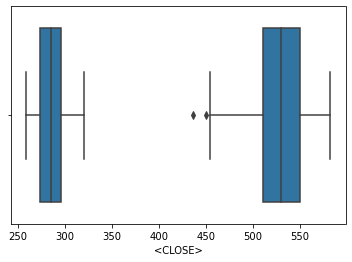

In [122]:
sns.boxplot(rosn, whis=1.5)
sns.boxplot(sber, whis=1.5)

#### Видно, что в акциях Роснефть есть выбросы низких цен.
Подробности

In [135]:
df_rosn[df_rosn['<CLOSE>'] < 450]

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,436.00,6387860
1,2021-01-05,449.35,6724540


In [136]:
df_rosn.head(20)

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,436.00,6387860
1,2021-01-05,449.35,6724540
2,2021-01-06,453.70,8220600
3,2021-01-08,478.20,12695070
4,2021-01-11,473.25,8789190
5,2021-01-12,474.40,7081940
6,2021-01-13,485.95,15288640
7,2021-01-14,505.00,15394440
8,2021-01-15,512.20,17888660
9,2021-01-18,516.50,10712490


In [137]:
df_sber.head(20)

,<DATE>,<CLOSE>,<VOL>
0,2021-01-04,272.00,48799460
1,2021-01-05,275.20,45554100
2,2021-01-06,272.93,40905340
3,2021-01-08,283.64,88672940
4,2021-01-11,289.49,112210400
5,2021-01-12,289.99,78890100
6,2021-01-13,283.78,67489780
7,2021-01-14,284.79,74616910
8,2021-01-15,276.90,73687110
9,2021-01-18,279.79,73676310


Видно, что стоимость акций Роснефть стала расти после Новогодних Праздников. Видимо, это связано с новостью:

"Роснефть" в период с 28 декабря 2020 года по 1 января 2021 года приобрела 13000 акций и GDR в рамках buyback.

##### Статистическая гипотеза:
Утверждается, что мат. ожидание по стоимости акции Роснефти - больше 535 при уровне значимости 0.05.

In [217]:
mean_samples = rosn.mean()
std_samples = np.std(rosn, ddof=1)
mean_0 = 535
n = len(rosn)
alpha = 0.05

mean_samples, std_samples, n

(527.9857142857143, 31.049081581150954, 105)

- Используем t-статистику, т.к. дисперсия по генеральной совокупности неизвестна.
- mean_0 = 560
- H0: mean > mean_0
- H1: mean < mean_0
- Используем тест на левую критическую область.

In [218]:
t1 = stats.t.ppf(alpha, df=n-1)
t1

-1.6596374367131448

In [219]:
t_stat = (mean_samples - mean_0) / (std_samples / sqrt(n))
t_stat

-2.314884586354175

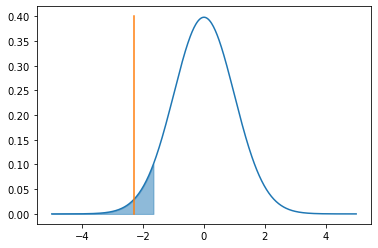

In [220]:
# Визуализация
import matplotlib.pyplot as plt

ox = np.linspace(-5, 5, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-5, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')

tx = [t_stat] * 2
ty = np.linspace(0, .4, 2)
plt.plot(tx, ty)

#### Вывод: Значение попало в левую критическую область, H0 отвергается. Мат. ожидание по стоимости акции Роснефти - не больше 535.

Определим P-value.

In [221]:
s = t_stat
p_left = stats.t.cdf(s, df=n-1)
p_right = 1-stats.t.cdf(s, df=n-1)
p_value = 2*min(p_left, p_right)
p_value, p_left

(0.022583691864923403, 0.011291845932461702)

В предложенной гипотезе уровень значимости ~0.011 означал бы не опровержение H0.

Определение доверительного интервала для указанного уровня значимости и мат. ожидания.

In [224]:
t1 = stats.t.ppf(alpha/2, df=n-1)
t2 = stats.t.ppf(1-alpha/2, df=n-1)

mean_samples + t1 + std_samples/sqrt(n), mean_samples + t2 + std_samples/sqrt(n)

(529.0327568572943, 532.9988319101403)

Матрица ковариации акций Роснефть и Сбер

In [226]:
np.cov(rosn, sber)

array([[964.04546703, 216.01232212],
       [216.01232212, 210.8908609 ]])

Матрица ковариации акций Роснефть и объема

In [228]:
np.cov(df_rosn['<CLOSE>'], df_rosn['<VOL>'])

array([[ 9.64045467e+02, -1.62629957e+06],
       [-1.62629957e+06,  1.17709167e+13]])

Ничего не понятно

Корреляция

In [230]:
np.corrcoef(rosn, sber)

array([[1.        , 0.47907211],
       [0.47907211, 1.        ]])

Удивительно, но есть намек на некую связь между стоимость акций Сбера и Роснефти.

In [233]:
np.corrcoef(rosn[1:], sber[:-1])

array([[1.        , 0.45695166],
       [0.45695166, 1.        ]])

In [234]:
np.corrcoef(rosn[:-1], sber[1:])

array([[1.        , 0.45467072],
       [0.45467072, 1.        ]])

Никакого изменения в корреляции для +-1 день не видно, т.е. цена акций одной компании не зависит от вчерашней цены акции другой компании.

### Гипотеза: Стоимость акций Яндекс зависит от стоимости на нефть (здесь отображена компаниями ГПН и Роснефть) и акциями компаний - банков (Сбер и ВТБ).

Проверим эту гипотезу построением модели линейной регрессии и определением коэффициента детерминации.

In [255]:
from sklearn.linear_model import LinearRegression as lr

X = pd.DataFrame(np.array([df['<CLOSE>'] for df in dfs[:-1]]).T)
y = np.array(dfs[-1]['<CLOSE>'])
model = lr().fit(X, y)
model.intercept_, model.coef_

(6674.581789546853,
 array([ 7.61153413e+00, -5.54973055e+00, -2.76302041e+00, -1.76318121e+04]))

In [257]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              8224.
Date:                Tue, 31 Aug 2021   Prob (F-statistic):                   5.58e-126
Time:                        17:24:49   Log-Likelihood:                         -737.64
No. Observations:                 105   AIC:                                      1483.
Df Residuals:                     101   BIC:                                      1494.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R2 очень близко к 1, проверим значимость.

In [259]:
n = len(y)
m = 4

k1 = m
k2 = n - m - 1

k1, k2

(4, 100)

In [260]:
# Критическая область
from scipy import stats

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.462614925911641

In [261]:
# Статистика Фишера
R2 = 0.997
F = (R2 / k1) / ((1 - R2) / k2)
F

8308.333333333325

Статистика Фишера совпадает со значением в таблице summary. И попадает в правую критическую область, т.к. уравнение регрессии - значимое.

### Вывод: Стоимость акций Яндекс и остальных компании можно описать моделью линейной регрессии с высоким коэффициентов детерминации.

Что очень странно.